# Desenvolvendo o algorítmo de machine learning

 - MA_MODEL

In [1]:
#  importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- importando os dados dos delitos

In [2]:
delitos_ny = pd.read_csv('select_ny.csv')

In [3]:
delitos_ny.head()

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora_da_ocorrencia,hora_termino_da_ocorrencia,duracao_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes
0,2015-12-31,2015-12-31,2015-12-31,23:25:00,23:30:00,0 days 00:05:00.000000000,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,em_frente,OTHER
1,2015-12-31,2015-12-31,2015-12-31,23:18:00,23:25:00,0 days 00:07:00.000000000,FELONY ASSAULT,nao_concluido,crime,N.Y. POLICE DEPT,BROOKLYN,em_frente,DRUG STORE
2,2015-12-31,2015-12-31,2015-12-31,23:15:00,23:15:00,0 days 00:00:00.000000000,DANGEROUS WEAPONS,concluido,crime,N.Y. POLICE DEPT,BRONX,em_frente,STREET
3,2015-12-31,2015-12-31,2015-12-31,23:15:00,23:30:00,0 days 00:15:00.000000000,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,BRONX,dentro,RESIDENCE - APT. HOUSE
4,2015-12-31,2015-12-31,2015-12-31,23:10:00,23:10:00,0 days 00:00:00.000000000,PETIT LARCENY,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,dentro,DRUG STORE


 - convertendo as colunas data para Datetime

In [4]:
delitos_ny['data_da_ocorrencia'] = pd.to_datetime(delitos_ny['data_da_ocorrencia'])

In [5]:
delitos_ny['data_final_da_ocorrencia'] = pd.to_datetime(delitos_ny['data_final_da_ocorrencia'])

In [6]:
delitos_ny['data_comunicacao_policia'] = pd.to_datetime(delitos_ny['data_comunicacao_policia'])

 - Selecionando apenas os delitos concluídos nos anos 2014 e 2015

In [7]:
delitos_ny = delitos_ny.query('conclusao == "concluido" and data_da_ocorrencia >= "2014-01-01"')

In [8]:
delitos_ny['data_da_ocorrencia'].dt.year.value_counts()

2014    303854
2015    294305
Name: data_da_ocorrencia, dtype: int64

###    Descrição da ofensa

 - selecionando a variável 
 - criando um dataframe data x descrição dos delitos

In [9]:
descricao_da_ofensa = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.descricao_da_ofensa)

In [10]:
descricao_da_ofensa.head()

descricao_da_ofensa,ABORTION,ADMINISTRATIVE CODE,AGRICULTURE & MRKTS LAW-UNCLASSIFIED,ALCOHOLIC BEVERAGE CONTROL LAW,ANTICIPATORY OFFENSES,ARSON,ASSAULT 3 & RELATED OFFENSES,BURGLAR'S TOOLS,BURGLARY,CHILD ABANDONMENT/NON SUPPORT,...,PROSTITUTION & RELATED OFFENSES,RAPE,ROBBERY,SEX CRIMES,THEFT OF SERVICES,THEFT-FRAUD,UNAUTHORIZED USE OF A VEHICLE,UNDER THE INFLUENCE OF DRUGS,UNLAWFUL POSS. WEAP. ON SCHOOL,VEHICLE AND TRAFFIC LAWS
data_da_ocorrencia,,,,,,,,,,,,,,,,,,,,,
2014-01-01,0,2,0,1,0,6,221,0,34,0,...,0,16,20,43,0,33,7,0,0,2
2014-01-02,0,8,0,0,0,1,51,0,49,0,...,0,1,21,5,0,5,4,0,0,2
2014-01-03,0,0,0,0,0,9,84,0,23,0,...,1,3,14,3,0,13,2,0,0,1
2014-01-04,0,2,0,0,0,6,84,0,33,0,...,0,2,18,3,0,6,0,0,0,3
2014-01-05,0,5,0,0,0,1,89,1,30,0,...,0,2,20,8,0,7,3,0,0,2


###  Delitos mais graves

 - Selecionando os delitos considerados mais graves

In [11]:
delitos_ny.descricao_da_ofensa.value_counts().head(40)

PETIT LARCENY                      117139
HARRASSMENT 2                       81317
ASSAULT 3 & RELATED OFFENSES        67875
CRIMINAL MISCHIEF & RELATED OF      62065
GRAND LARCENY                       58116
OFF. AGNST PUB ORD SENSBLTY &       28001
BURGLARY                            26860
FELONY ASSAULT                      25236
DANGEROUS DRUGS                     24539
MISCELLANEOUS PENAL LAW             17501
ROBBERY                             15527
OFFENSES AGAINST PUBLIC ADMINI      11556
GRAND LARCENY OF MOTOR VEHICLE      10269
DANGEROUS WEAPONS                    8228
CRIMINAL TRESPASS                    7422
SEX CRIMES                           5604
THEFT-FRAUD                          5352
FRAUDS                               3495
FORGERY                              3218
INTOXICATED & IMPAIRED DRIVING       2406
POSSESSION OF STOLEN PROPERTY        2046
UNAUTHORIZED USE OF A VEHICLE        1878
VEHICLE AND TRAFFIC LAWS             1682
ADMINISTRATIVE CODE               

 - após verificar os tipos de delitos selecionamos  os delitos abaixo como sendo os mais graves
 
    'FELONY ASSAULT','DANGEROUS DRUGS','SEX CRIMES','DANGEROUS WEAPONS'

In [12]:
# criando um DataFrame apenas com os 4 tipos de delitos considerados mais graves
delitos_mais_graves = descricao_da_ofensa.loc[:,['FELONY ASSAULT','DANGEROUS DRUGS',
                                                 'SEX CRIMES','DANGEROUS WEAPONS']]

In [13]:
# renomenado as colunas do DataFrame
delitos_mais_graves.columns = ['crime_de_assalto','drogas_perigosas','crimes_sexuais','armas_perigosas']

In [14]:
delitos_mais_graves.head()

,crime_de_assalto,drogas_perigosas,crimes_sexuais,armas_perigosas
data_da_ocorrencia,,,,
2014-01-01,87,40,43,21
2014-01-02,29,38,5,10
2014-01-03,23,28,3,5
2014-01-04,28,29,3,12
2014-01-05,27,24,8,6


 ## Criando o DataFrame "crimes_sexuais" 

In [15]:
crimes_sexuais = delitos_mais_graves.crimes_sexuais.to_frame()

 - Graficando "crimes_sexuais"

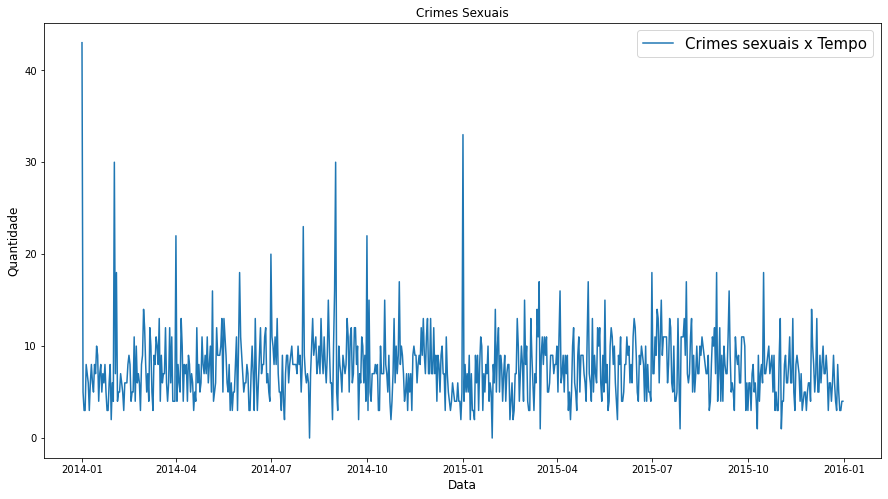

In [16]:
plt.figure(figsize=(15,8))
plt.plot(crimes_sexuais)
plt.title('Crimes Sexuais', fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
legenda= ['Crimes sexuais x Tempo']
plt.legend(legenda, fontsize=15, loc=1)
plt.show()

- Criando as amostras de treino e teste

In [17]:
t_treino = crimes_sexuais[crimes_sexuais.index<'2014-06-01'].index.values
t_teste = crimes_sexuais[crimes_sexuais.index>='2014-06-01'].index.values
X_treino = crimes_sexuais[crimes_sexuais.index<'2014-06-01'].values
X_teste = crimes_sexuais[crimes_sexuais.index>='2014-06-01'].values

- aplicando o modelo média móvel

In [18]:
forecast = len(X_teste)

In [19]:
y_hat_avg = X_teste.copy()

In [20]:
y_hat_avg['predicao'] = 0

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [21]:
for i in range(forecast):
    y_hat_avg['predicao'].iloc[i] = X_treino['Temp'].rolling(i).mean().iloc[-1]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices